# Project: Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Medical Appointments No Show dataset has been selected for this project. The dataset contains columns with information on identification of the patient, identification of each appointment, gender of the patient, day of the actual appointment, the day someone callled to make the appointment, the age of the patient, where the appointment takes place, scholarship under the Bolsa Familia, whether patient has hipertension, diabetes, alcoholism or handicap, number of messages sent to the patient and whether the patient showed up.
>
> Did patients who received an SMS have a higher rate of showing up? Does age affect the likelihood of a patient showing up? Which gender had a higher rate of showing up? Do patients with alcoholism have a higher chance of showing up?

In [97]:
# Importing all the packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [98]:
# Read the dataset in from the website if it's not yet here

if not os.path.exists('appointments.csv'):
    !curl https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv -o appointments.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.2M  100 10.2M    0     0   952k      0  0:00:11  0:00:11 --:--:-- 1108k


In [99]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('appointments.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### General Properties

In [100]:
df.shape

(110527, 14)

A simple observation of the dataset which we see has 110527 rows and 14 columns.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Checking to see if we have any missing values in out dataset. All columns have the same number of rows hence no missing values.

In [102]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the data above we can see that the mean age of the patients in this dataset is 37 years, the oldest being 115 years. 

The minimum age of a patient is -1 which looks like an error.

We can also see that majority of the patiens did not have hipertension, diabetes, alcoholism or handicap. 

Around 32% of the patients received SMS.

In [103]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can observe the unique values for each column. Columns with 2 are boolean and have either 1 for true/yes and 0 for false/no.

In [106]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

We can see the data types for the columns and they are all convenient.

The dependent variable is No-show and the independent variables we will use in this analysis are SMS_received, Alcoholism, Scholarship, Age, and Gender.

We do not need PatientID, AppointmentID, ScheduledDay and AppointmentDay for this analysis.

## Data Cleaning 
### Dropping irrelevant columns and renaming the remaining ones

In [107]:
# Dropping irrelevant tables
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head(1) # Confirm if columns have been dropped.


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Dropped the irrelevant tables.

In [108]:
idx = df.Age.idxmin()
idx

99832

We get the index of the row with lowest Age

In [109]:
df.loc[idx]

Gender               F
Age                 -1
Neighbourhood    ROMÃO
Scholarship          0
Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
SMS_received         0
No-show             No
Name: 99832, dtype: object

Confirming the lowest Age is -1. We can drop it.

In [110]:
df.drop(labels=99832, inplace=True)

In [111]:
idx = df.Age.idxmin()
df.loc[idx] # Confirm if dropped

Gender                   F
Age                      0
Neighbourhood    CONQUISTA
Scholarship              0
Hipertension             0
Diabetes                 0
Alcoholism               0
Handcap                  0
SMS_received             0
No-show                 No
Name: 59, dtype: object

Age 0 is acceptable for babies

In [116]:
# Renaming columns for consistency
df.rename(columns=lambda x:x.strip().replace('-','_'),inplace=True)
df.columns.str.lower()

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

This allows us to easily reference any column. The data is now clean we can begin the exploration phase.

In [121]:
df['No_show'] = df['No_show'].replace({'Yes':1,'No':0})

In [122]:
df.to_csv('appointments.csv', index =False)

We convert the No_show column to store 1 and 0 as well for consistency and allows us to easily perform mathematical operations on the column

In [123]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### 1) Did patients who received an SMS have a higher rate of showing up?

In [161]:
df.groupby('SMS_received')['No_show'].value_counts()

SMS_received  No_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No_show, dtype: int64

We can see the number of patients that attend or miss appoitnments and whether they received an SMS or not

Text(0.5, 1.0, 'Plot of influence of SMS received')

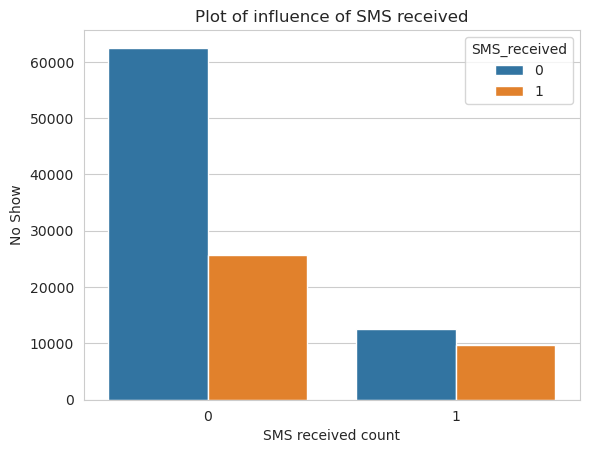

In [167]:
ax = sns.countplot(x=df['No_show'],hue=df['SMS_received'])
ax.set_xlabel('SMS received count')
ax.set_ylabel('No Show')
ax.set_title('Plot of influence of SMS received')
# sms=my_plot("No_show","SMS_received")

Patients who did not receive SMS showed up more since they are the majority.

Patients who received SMS missed less appoitments indicating an influence.


### 2) Does age affect the likelihood of a patient showing up?

In [155]:
no_show_no=df.No_show==0
df.Age[no_show_no].mean() # mean age of those who showed up

37.790504154999034

In [157]:
no_show_yes=df.No_show==1
df.Age[no_show_yes].mean() # mean age of those who did not show up

34.31766656212196

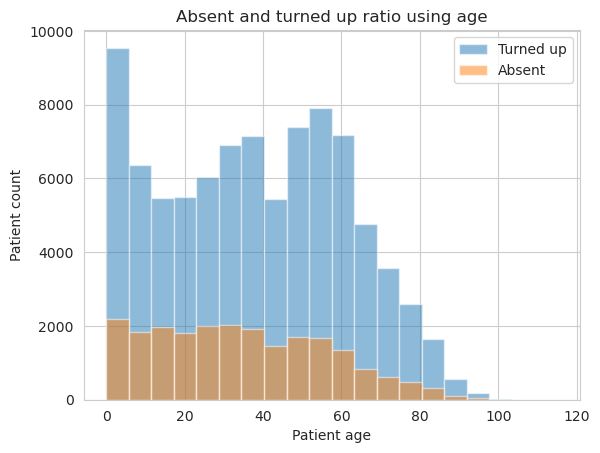

In [160]:
df.Age[no_show_no].hist(alpha=0.5,bins =20,  label ='Turned up')
df.Age[no_show_yes].hist(alpha=0.5, bins = 20, label ='Absent')
plt.ylabel("Patient count")
plt.xlabel("Patient age")
plt.title("Absent and turned up ratio using age")
plt.legend();

The bar plot above shows that older people are more likely to turn up for their appointments. Although it is very hard to conclude since the mean age for showing up and not showing up is similar and all ages have patients who were absent.

### 3) Which gender had a higher rate of showing up? 

In [124]:
gender_noshow = df.groupby('Gender').sum()['No_show']

In [135]:
gender_noshow

Gender
F    14594
M     7725
Name: No_show, dtype: int64

We group based on gender the number of patients who did not show up.

<AxesSubplot: title={'center': 'Pie chart of absence based on gender'}, ylabel='No_show'>

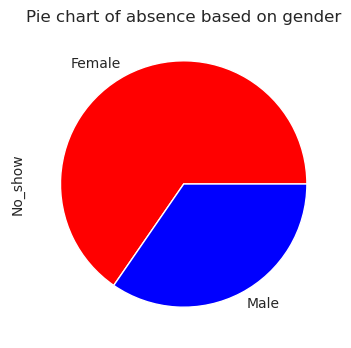

In [145]:
sex=['Female','Male']
colors = ['red','blue']
gender_noshow.plot.pie(figsize=(4,4),title = 'Pie chart of absence based on gender', labels =sex, colors=colors)

This shows that more female patients miss their appointments. Because the females are more using proportions would be more accurate.

In [140]:
prop_male = gender_noshow.M/gender_noshow.sum()
print(total_male)
prop_fem = gender_noshow.F/gender_noshow.sum()
prop_fem

0.346117657601147


0.653882342398853

We get the proportions of absence based on gender.

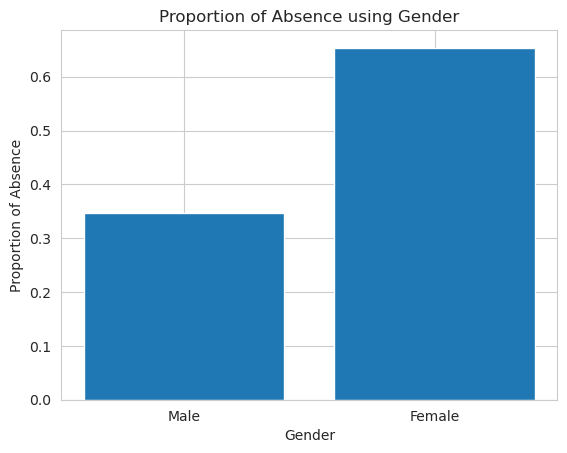

In [143]:
sns.set_style('whitegrid')
plt.bar(["Male", "Female"], [prop_male, prop_fem])
plt.title("Proportion of Absence using Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion of Absence");

Proportions confirm that females in general miss more appointments.

### 4) In which neighbourhood do patients have the hightest absence rate?

In [148]:
neighbourhood = df.groupby('Neighbourhood').sum()['No_show']

In [150]:
neighbourhood.sort_values (ascending=False)

Neighbourhood
JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
PARQUE INDUSTRIAL                 0
Name: No_show, Length: 81, dtype: int64

Arrange neighborhood based on absence counts in descending order.

Text(0, 0.5, 'Number of absent patients on medical appointments.')

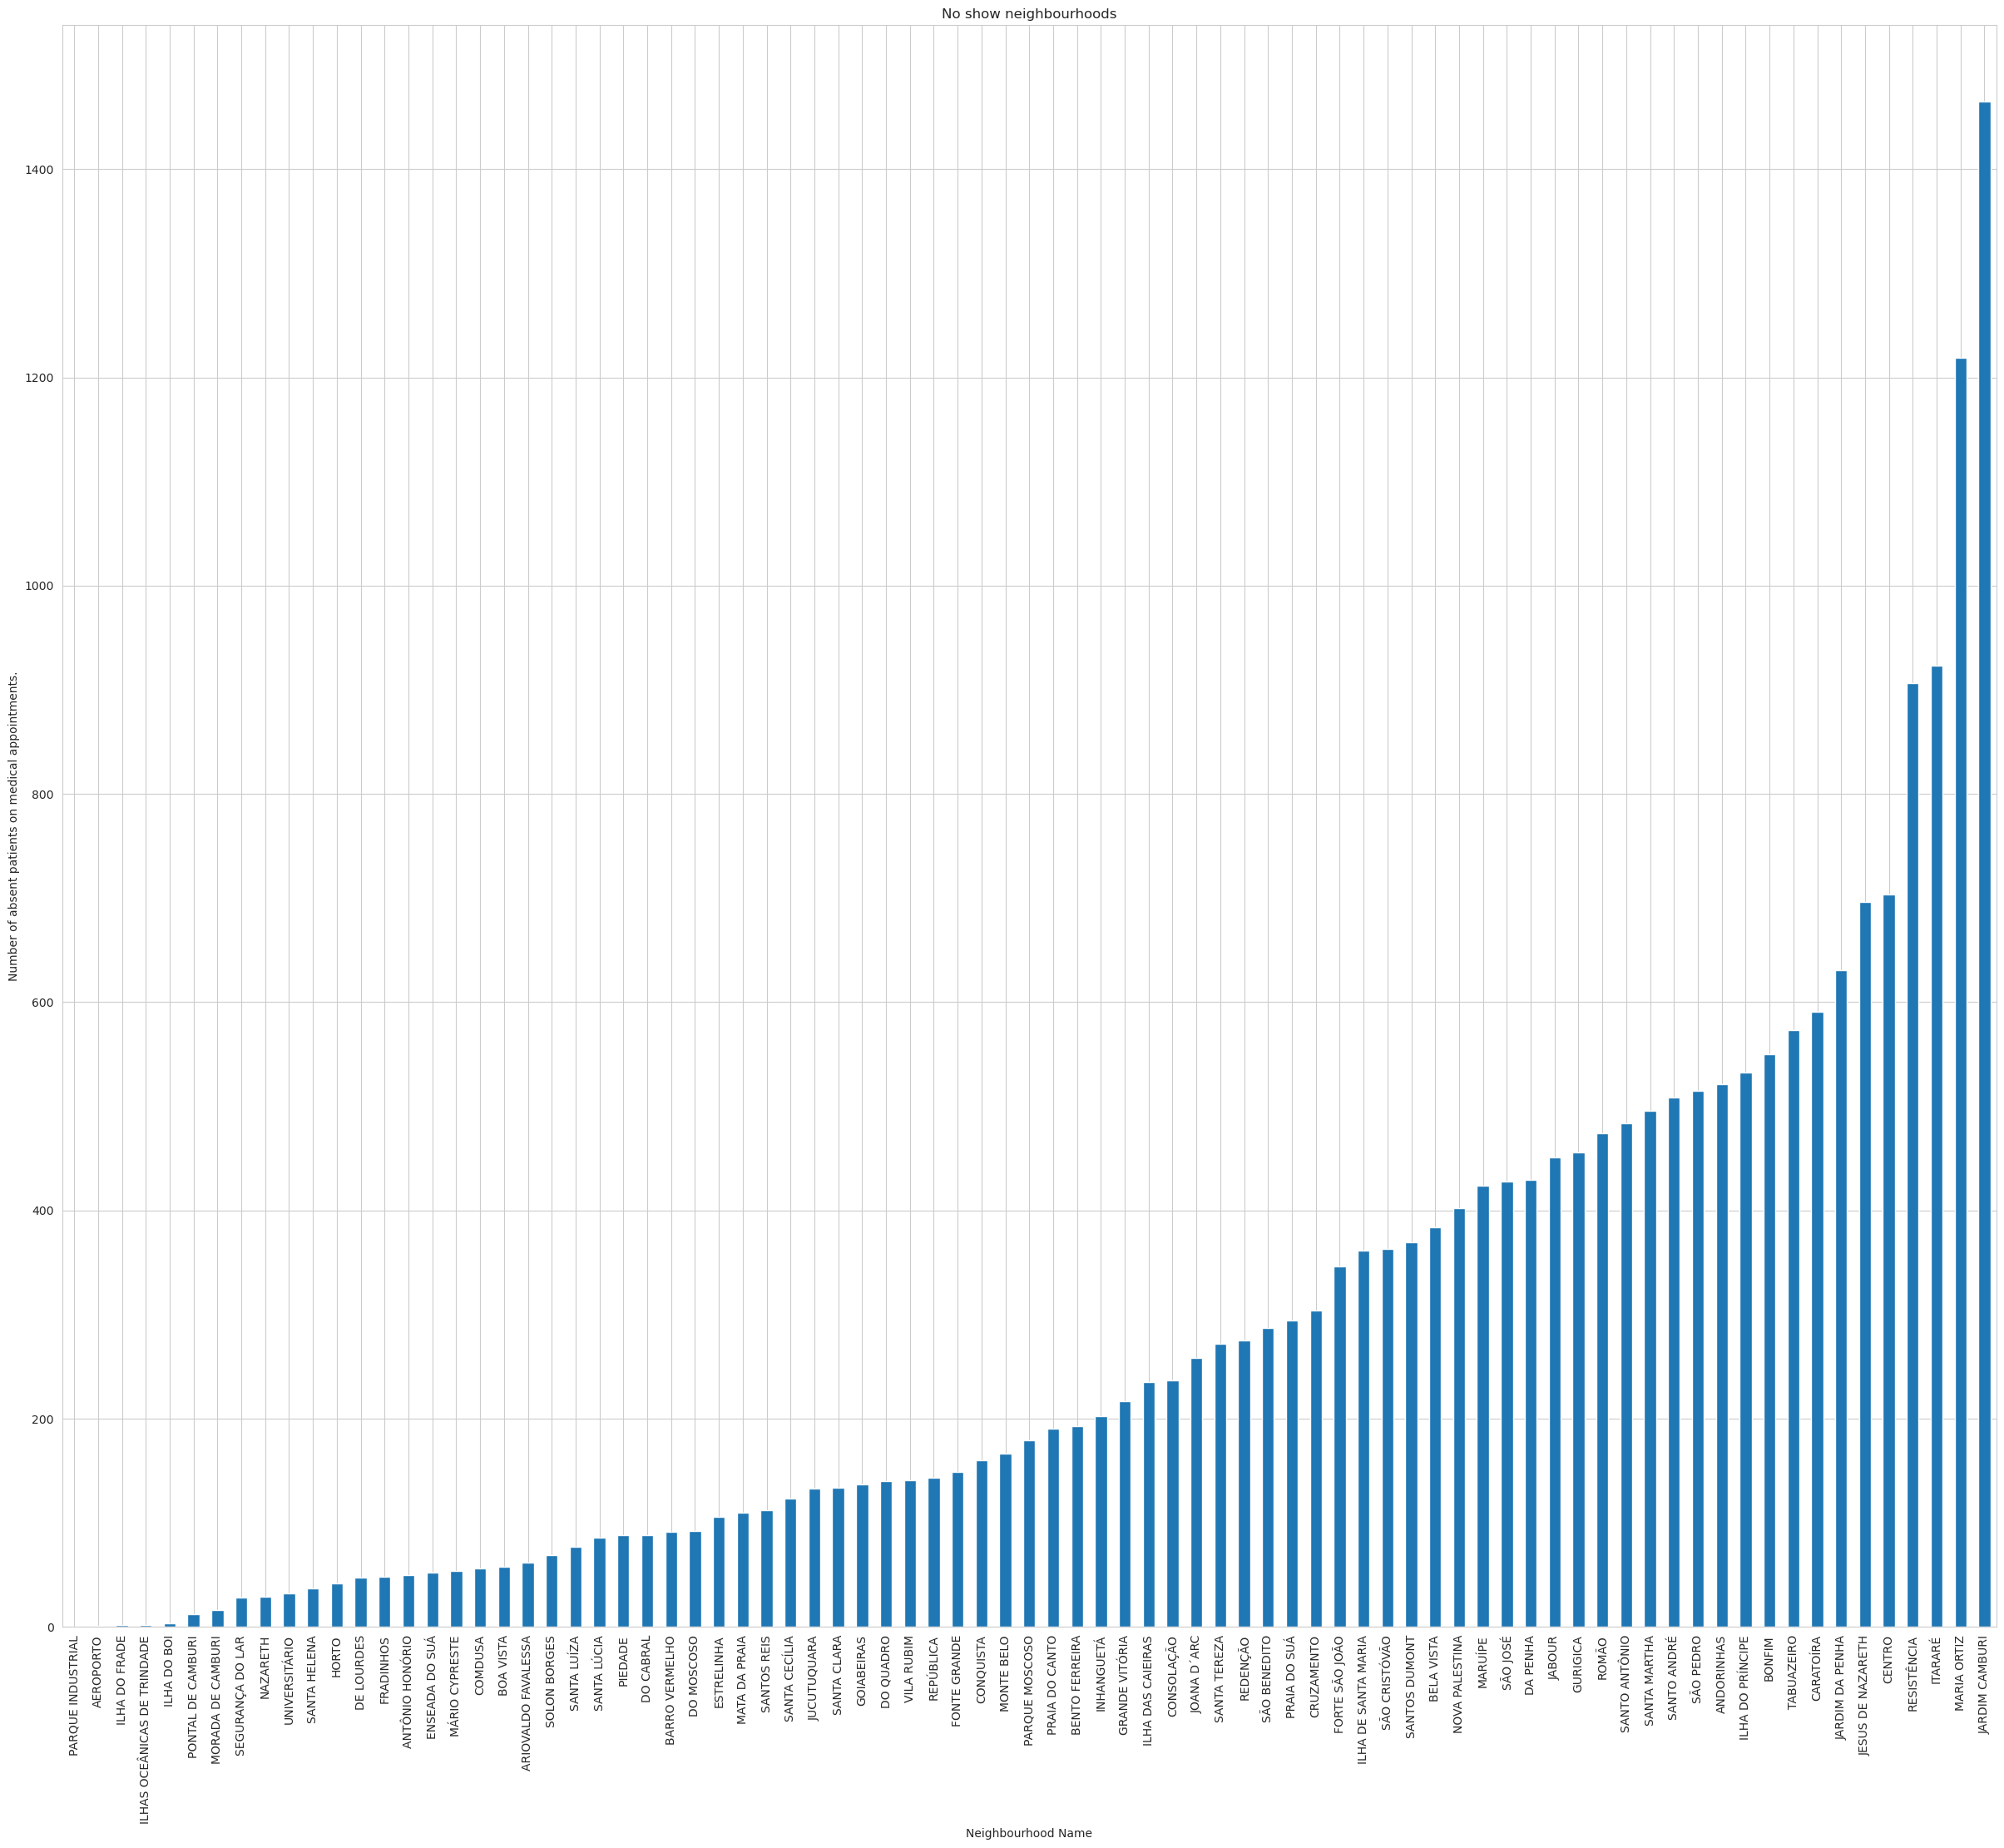

In [151]:
ax = neighbourhood.sort_values (ascending=True).plot(kind='bar',figsize=(30,25), title = 'No show neighbourhoods')
ax.set_xlabel("Neighbourhood Name")
ax.set_ylabel("Number of absent patients on medical appointments.")

JARDIM CAMBURI has the highest absence rate for their appointments

<a id='conclusions'></a>
## Conclusions

From the analysis done, we can come to the following conclusions:
1) Receiving sms has slight effect on the patients not missing sessions. This is because a high number of patients did not receive sms and still showed up for their sessions. Perhaps a larger data sample would be able to show if receiving an SMS had influence.

2) Age has slight affect on the patients missing sessions as well since all ages miss sessions. There is a small indication that older people are less likely to miss sessions.

3) More females missed their sessions as compared to males. Since females were more, proportions were used to confirm this.

4) JARDIM CAMBURI neighbourhood has the highest rate of patients missing their appointments as compared to the other neighbourhoods.


**Limitations**

Some of the variables need more explanation in order it to be used effectively in the data analysis process, for example the alcoholism, handicap, scholarship and diabetes since their correlation to a patient being absent is not clear.

